# Assignment 3 - Classification
### CS450 Spring 2023

This assignment contains three problems.
We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

There are demo notebooks in Google Drive that can help you get started.

I did not include any starter code.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


## Don't forget to save a copy of the notebook

Student Name: Grant Wilson
<br>If you used pair programming..
<br>Programming Partner: Manuel Osuna


## Problem 1 - Decision Trees (20 points)
* Pull the data from https://archive.ics.uci.edu/ml/datasets/Credit+Approval
* Create a decision tree to determine if credit should be extended based on a test case.
* Grading criteria:
    * Demonstrate that you evaluated the data set and applied aduquate preprocessing to the data
    * Make sure you comment you code and the cleaning process so we can follow your logic in grading
    * Provide a confusion matrix for your results. Text based is fine.
    * Provide a visualization with explanation that demonstrates logical evaluation of the model
* Actual accuracy can depend on how you split the training and test data and other random variations
    * If you get below 70% accuracy, there may be a problem with your model
* *Spoiler Alert*: If you don't start with some exploration to determine how to approach data cleaning, this will be more difficult than it should be.
    

Model: Decision Tree
Accuracy: 0.7251908396946565
Precision: 0.7372881355932204
Recall: 0.9456521739130435
F1-score: 0.8285714285714286
Confusion matrix:
 [[ 8 31]
 [ 5 87]]


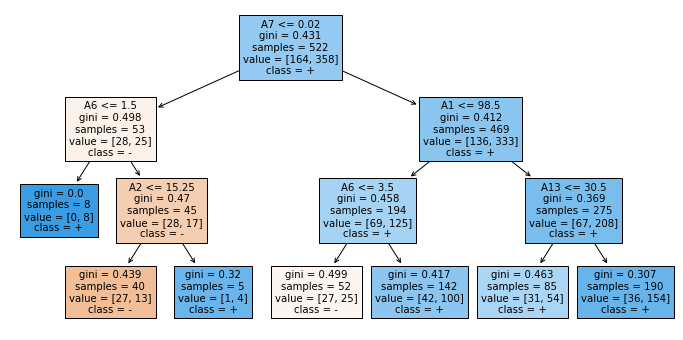

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Load the data from the URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
df = pd.read_csv(url, header=None)

# Define column names based on the dataset description
cols = ['target'] + ['A' + str(i) for i in range(1, 16)]
df.columns = cols

# Convert missing values '?' to NaN
df = df.replace('?', np.NaN)

# Drop rows with missing values
df = df.dropna()

# Convert non-numeric columns to numeric using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2, random_state=1)

# Define the models to be tested
models = {'Decision Tree': DecisionTreeClassifier(random_state=1)}

# Perform hyperparameter tuning using GridSearchCV
params = {'max_depth': [3, 5, 7],
          'min_samples_leaf': [1, 3, 5]}
best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

# Evaluate the best model on the test data
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print('Model:', name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('Confusion matrix:\n', cm)

    # Visualize the decision tree
    if name == 'Decision Tree':
        plt.figure(figsize=(12, 6))
        plot_tree(model, feature_names=df.columns[1:], class_names=['-', '+'], filled=True)
        plt.show()


Put the explanation of your model here:


First we import the necessary libraries, load the data from the URL using the pandas read_csv function and assign column names to the data based on the dataset. To preprocess the data we convert missing values '?' to NaN using the replace function from NumPy and drop the rows with missing values using the dropna function from pandas.Then we convert non-numeric columns to numeric using LabelEncoder, which transforms categorical data into numerical labels. After that we split the data into training and testing sets and define the model to be tested, then when we get the score we want from the performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix we visualize the decision tree using the plot_tree function.

### Problem 2 - K-means (10 points)
* Use the Ecoli dataset at https://archive.ics.uci.edu/ml/datasets/Ecoli
* Ignore the label and create clusters using k values between 4 and 6.
* Pick the best k value and explain why you picked it
* Show any calculations or visualizations you used to pick the best cluster
* Create two visualization
    * One colors the nodes with the cluster membership
    * The other colors the nodes based on the actual label
* Grading criteria: Adequately describe how to pick the best cluster and successful create the required visualizations
* Pick two features for your cluster visualization or use PCA

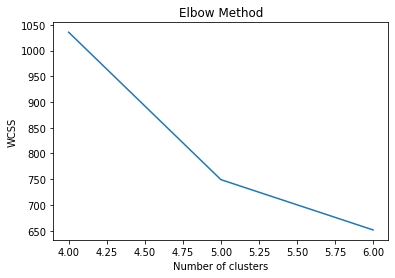

Best k value: 5


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


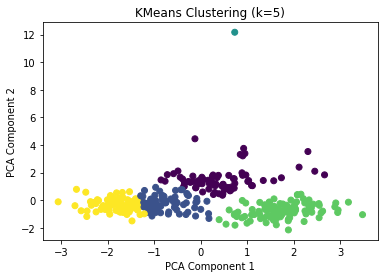

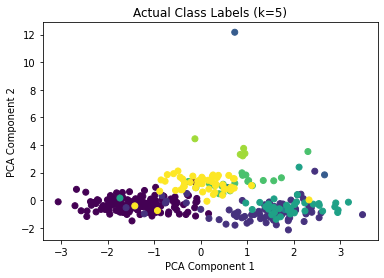

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data'
names = ['sequence_name', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
data = pd.read_csv(url, delim_whitespace=True, names=names)

# Remove sequence name and class columns
X = data.drop(['sequence_name', 'class'], axis=1)

# Normalize data
X = (X - X.mean()) / X.std()

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(4, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6, 4))
plt.plot(range(4, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, we choose k=5
k = 5
print(f"Best k value: {k}")

# Create PCA object
pca = PCA(n_components=2)

# Create KMeans object
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit KMeans object to PCA-transformed data
kmeans.fit(pca.fit_transform(X))

# Add cluster labels to original data
data['cluster'] = kmeans.labels_

# Plot clusters colored by cluster membership
plt.figure(figsize=(6, 4))
plt.scatter(pca.fit_transform(X)[:, 0], pca.fit_transform(X)[:, 1], c=data['cluster'])
plt.title(f'KMeans Clustering (k={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot clusters colored by actual class labels
plt.figure(figsize=(6, 4))
plt.scatter(pca.fit_transform(X)[:, 0], pca.fit_transform(X)[:, 1], c=data['class'].astype('category').cat.codes)
plt.title(f'Actual Class Labels (k={k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Provide an explanation of your model:



We used k-means clustering on some data about where proteins are located in E. coli cells, got rid of some extra columns and made sure all the data is on the same scale by normalizing it. We also used the elbow method to find how many k clusters we needed, it ended up being 5. Then we used PCA to vizualize the data, to make it fit in a 2d space we only took 2 components from the data set. The scatterplots are colored in clusters, in the first its kmeans clustering and in the second its labels.


### Problem 3 - Support Vector Machines (10 points)
* Use the Iris trainging set
* Explore the data to find the best two features to use
    * We are mostly doing this so we can visualize the results
* Split the data set into 80% training and 20% testing
* Create a SVM to model the data
* Create a visualization that shows the line
* Create anonther visualization that shows the decision surface
    * Do not include the test data points
    * Randomly select 10 test points and add them to the visualization. Color them based on their label
    * Are the random test points consistently on the correct side of the line?
* Predict the label for ALL of the test data
    * Show a confusion matrix
    * Calculate the F1 measure
* Grading criteria:
    * SVM graphically appears to correctly to use a reasonable line
    * F1 measure is consistent with what we showed in class

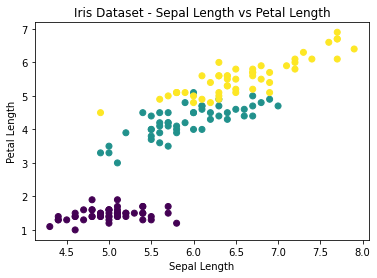

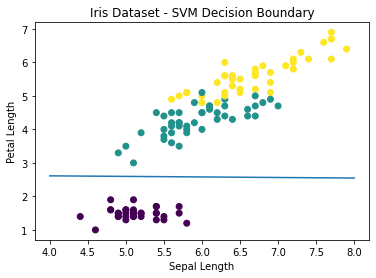

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


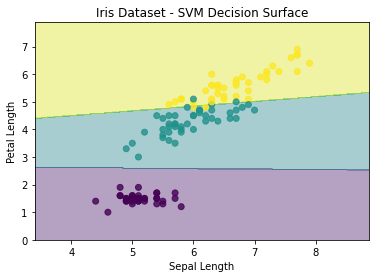

Confusion Matrix:
 [[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]
F1 Score: 0.9672014260249554


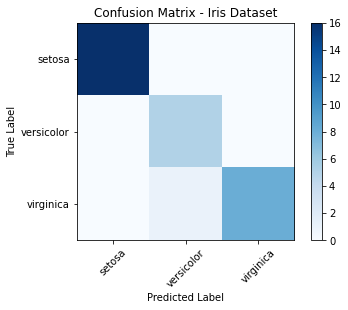

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score

# Load the iris dataset
iris = load_iris()

# Create a DataFrame with the feature variables
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create a DataFrame with the target variable
y = pd.DataFrame(iris.target, columns=['target'])

# Explore the data to find the best two features to use
plt.scatter(X['sepal length (cm)'], X['petal length (cm)'], c=y['target'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - Sepal Length vs Petal Length')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[['sepal length (cm)', 'petal length (cm)']], y, test_size=0.2)

# Create a SVM model
clf = SVC(kernel='linear')

# Fit the model to the training data
clf.fit(X_train, y_train.values.ravel())

# Create a visualization that shows the line
plt.scatter(X_train['sepal length (cm)'], X_train['petal length (cm)'], c=y_train['target'])
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - SVM Decision Boundary')
plt.show()

# Create another visualization that shows the decision surface
x_min, x_max = X_train['sepal length (cm)'].min() - 1, X_train['sepal length (cm)'].max() + 1
y_min, y_max = X_train['petal length (cm)'].min() - 1, X_train['petal length (cm)'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train['sepal length (cm)'], X_train['petal length (cm)'], c=y_train['target'], alpha=0.8)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Iris Dataset - SVM Decision Surface')
plt.show()

# Randomly select 10 test points and add them to the visualization. Color them based on their label
np.random.seed(0)
test_indices = np.random.choice(X_test.index, 10)
X_test_subset = X_test.loc[test_indices]
y_test_subset = y_test.loc[test_indices]
y_pred_subset = clf.predict(X_test_subset)

# Plot the decision surface with test points
x_min, x_max = X_train['sepal length (cm)'].min() - 1, X_train['sepal length (cm)'].max() + 1
y_min, y_max = X_train['petal length (cm)'].min() - 1, X_train['petal length (cm)'].max() + 1

#Predict the labels for all the test data
y_pred = clf.predict(X_test)

#Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Print the confusion matrix
print("Confusion Matrix:\n", cm)

#Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

#Print the F1 score
print("F1 Score:", f1)

#Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Iris Dataset')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Explanation of your model:
> The code uses a SVM classifier on the Iris dataset and explores to find the best features for visualization. The data is then split into a 80:20 ratio. The SVM model is made using a linear kernel and trained with the training set. Two visuals are also made; one showing the SVM deicision boundry seperating the two two classes using the two best features, and the other shows the SVM decision surface. This is the classification boundry that seperates the classes in a muilti-dimensional space. Ten random points are added to the decsion surface visualization to see if the model classifies them correctly. The performance of the model is evaluated by oredicting the labels for the test data and making a confusion matric and F1 score. The confusion matrix shows the amount of false positives, true positives, false negatives, and true negatives. The F1 Score is the weighted average of precision and recall.

